In [1]:
import psycopg2

conn = psycopg2.connect("dbname=db-dev user=postgres password=rosa host=localhost")
cur = conn.cursor()
cur.execute('SELECT * FROM "Items"')

records = cur.fetchall()
print(records)

[(1, 1245, 'playstation', 1.5, datetime.datetime(2022, 9, 14, 15, 46, 10, 297000, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 9, 14, 15, 46, 10, 297000, tzinfo=datetime.timezone.utc)), (2, 1245, 'playstation', 1.5, datetime.datetime(2022, 9, 15, 18, 16, 25, 861000, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 9, 15, 18, 16, 25, 861000, tzinfo=datetime.timezone.utc)), (3, 1245, 'playstation', 1.5, datetime.datetime(2022, 9, 15, 18, 16, 25, 892000, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 9, 15, 18, 16, 25, 892000, tzinfo=datetime.timezone.utc)), (4, 1246, 'phone', 8.5, datetime.datetime(2022, 9, 15, 18, 16, 43, 639000, tzinfo=datetime.timezone.utc), datetime.datetime(2022, 9, 15, 18, 16, 43, 639000, tzinfo=datetime.timezone.utc))]


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StringType, StructType, StructField

def basic_df_example(spark: SparkSession) -> None:
    df = spark.read.json("/home/rosasilva/Downloads/spark-3.3.0-bin-hadoop3/examples/src/main/resources/people.json")
    df.show()
    df.select("name").show()
    df.printSchema()


if __name__ == "__main__":
    spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()

    basic_df_example(spark)
#schema_inference_example(spark)
   # programmatic_schema_example(spark)

    spark.stop()

22/09/16 14:48:13 WARN Utils: Your hostname, gitlab resolves to a loopback address: 127.0.1.1; using 192.168.1.11 instead (on interface wlp0s20f3)
22/09/16 14:48:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/16 14:48:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/09/16 14:48:14 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+

+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [44]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.sql import DataFrameReader
import findspark
from pyspark.sql.functions import isnan, when, count, col


findspark.add_packages('org.postgresql:postgresql:42.3.6')

spark = SparkSession.builder.config("spark.jars", "/opt/spark/jars/postgresql-42.3.6.jar").master("local").appName("PySpark_Postgres_test").getOrCreate()
df = spark.read.format("jdbc").option("url", "jdbc:postgresql://localhost/db-dev").option("dbtable", 'items').option("user", "postgres").option("password", "rosa").option("driver", "org.postgresql.Driver").load()
df.count()
df.printSchema()
df.select("name").show()
df.select(df['name'], df['is_healthy']).show()
sum = df.select([count(when(col(c) == "", c).when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

sum = df.select([count(when(col(c) == "", c).when(col(c).isNull(), c)).alias(c) for c in df.columns]).collect()

# #Plot
from matplotlib import pyplot 
df = spark.createDataFrame(sum ,['field','count'])
df.show()
# indexes = list(range(len(sum)))

# values = [r['count'] for r in df]
# labels = [r['field'] for r in df]

# bar_width = 0.35
# pyplot.bar(indexes, values)
# #add labels
# labelidx = [i + bar_width for i in indexes] 
# pyplot.xticks(labelidx, labels)
# pyplot.show()



root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- is_healthy: boolean (nullable = true)

+--------------------+
|                name|
+--------------------+
|iPhone           ...|
|coffee           ...|
|                 ...|
|água             ...|
|playstation      ...|
+--------------------+

+--------------------+----------+
|                name|is_healthy|
+--------------------+----------+
|iPhone           ...|      null|
|coffee           ...|      null|
|                 ...|      null|
|água             ...|      null|
|playstation      ...|      true|
+--------------------+----------+

+---+----+----------+
| id|name|is_healthy|
+---+----+----------+
|  0|   0|         4|
+---+----+----------+

+-----+-----+----------+
|field|count|is_healthy|
+-----+-----+----------+
|    0|    0|         4|
+-----+-----+----------+



In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.sql import DataFrameReader
import findspark
from pyspark.sql.functions import isnan, when, count, col

findspark.add_packages('org.postgresql:postgresql:42.3.6')

spark = SparkSession.builder.config("spark.jars", "/opt/spark/jars/postgresql-42.3.6.jar").master("local").appName("PySpark_Postgres_test").getOrCreate()
df = spark.read.format("jdbc").option("url", "jdbc:postgresql://localhost/db-dev").option("dbtable", 'items').option("user", "postgres").option("password", "rosa").option("driver", "org.postgresql.Driver").load()
df.count()
df.printSchema()
df.select("name").show()
df.select(df['name'], df['is_healthy']).show()

sum = df.select([count(when(col(c) == "", c).when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()
sum = df.select([count(when(col(c) == "", c).when(col(c).isNull(), c)).alias(c) for c in df.columns]).collect()



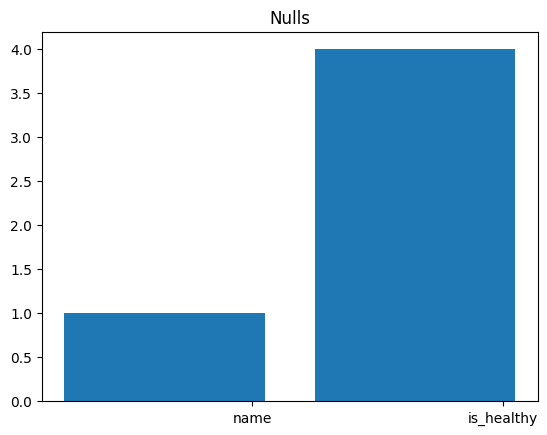

In [39]:
from matplotlib import pyplot 
l = [(  'name',    1)
     ,('is_healthy'         ,   4)]
df = spark.createDataFrame(l,['field','count'])
#Add values to a list (not recommend when you have a huge dataframe)
bla = df.collect()
#create a numeric value for every label
indexes = list(range(len(bla)))

#split words and counts to different lists 
values = [r['count'] for r in bla]
labels = [r['field'] for r in bla]

#Plotting
bar_width = 0.35

pyplot.bar(indexes, values)

#add labels
labelidx = [i + bar_width for i in indexes] 
pyplot.xticks(labelidx, labels)
pyplot.title("Nulls")
pyplot.show()

In [ ]:
#Step 2
#Validar que nas colunas (PK) location_key e buk_region da tabela dw.dim_str_location não há dados a null.



#create temp dataframe for nulls validation
from pyspark.sql.functions import when, col, count

df_test = sqlContext.table("dw.dim_str_location")
df_test.select([count(when(col(c) == "", c).when(col(c).isNull(), c)).alias(c) for c in df_test.columns]).show(vertical = True)